## CNN Model TA-D4TI 05 Model E

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
import cv2, os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers

Using TensorFlow backend.


## Set Directory Dataset American Sign Language

In [3]:
train_dir = 'mydata/train_set/'
train_folders = os.listdir(train_dir)
test_dir = 'mydata/test_set/'
test_files = os.listdir(test_dir)

## Build CNN Model

In [4]:
# Part 1 Building the CNN
# Importing the Keras libraries and packages


# Images Dimensions
img_width, img_height = 200, 200
train_data_dir = 'mydata/train_set'
test_data_dir = 'mydata/test_set'
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Conv2D(32, (9, 9), 
                      activation = "relu", 
                      input_shape = (200, 200, 3)))
# Parameter pertama (32) adalah nilai filter nya
# Parameter kedua adalah dimensi filter nya (3×3)
# Parameter ketiga adalah fungsi aktivasi yang kita gunakan (relu)
# Parameter keempat self explained yaitu bentuk input nya dan tipe nya (Grayscale)

# Step 2 - Pooling, Pooling bertujuan untuk mereduksi ukuran gambar
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Conv2D(32, (9, 9), activation = "relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding 3rd Concolution Layer
classifier.add(Conv2D(64, (9, 9), activation = "relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Step 3 - Flattening
# Data pooling yang kita miliki berupa array 2 dimensi kemudian dikonversi menjadi data satu dimensi single vector
classifier.add(Flatten())

# Step 4 - Full Connection
# Dense adalah fungsi untuk menambahkan layer yang fully connected.
# Parameter 1 (units)menandakan jumlah node yang harus ada di hidden layer,
# nilainya antara jumlah input node dan output node
classifier.add(Dense(256, activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(29, activation = "softmax"))

# Compiling The CNN,optimizer yang digunakan Stochastic Gradient Descent dengan learning rate 0.01 
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=256,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=256,
        class_mode='categorical')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


## Dataset Identification

In [5]:
x_train, y_train = [], []
for folder in train_folders:
    files = os.listdir(train_dir + folder)
    print('Reading images from ' + train_dir + folder + '/ ...')
    for file in files[:87000]:
        img = cv2.imread(train_dir + folder + '/' + file)
        img = cv2.resize(img, (200, 200))
        x_train.append(img)
        y_train.append(folder)

Reading images from mydata/train_set/A/ ...
Reading images from mydata/train_set/B/ ...
Reading images from mydata/train_set/C/ ...
Reading images from mydata/train_set/D/ ...
Reading images from mydata/train_set/del/ ...
Reading images from mydata/train_set/E/ ...
Reading images from mydata/train_set/F/ ...
Reading images from mydata/train_set/G/ ...
Reading images from mydata/train_set/H/ ...
Reading images from mydata/train_set/I/ ...
Reading images from mydata/train_set/J/ ...
Reading images from mydata/train_set/K/ ...
Reading images from mydata/train_set/L/ ...
Reading images from mydata/train_set/M/ ...
Reading images from mydata/train_set/N/ ...
Reading images from mydata/train_set/nothing/ ...
Reading images from mydata/train_set/O/ ...
Reading images from mydata/train_set/P/ ...
Reading images from mydata/train_set/Q/ ...
Reading images from mydata/train_set/R/ ...
Reading images from mydata/train_set/S/ ...
Reading images from mydata/train_set/space/ ...
Reading images from 

In [6]:
x_train, y_train = [], []
for folder in train_folders:
    files = os.listdir(test_dir + folder)
    print('Reading images from ' + test_dir + folder + '/ ...')
    for file in files[:87000]:
        img = cv2.imread(test_dir + folder + '/' + file)
        img = cv2.resize(img, (200, 200))
        x_train.append(img)
        y_train.append(folder)

Reading images from mydata/test_set/A/ ...
Reading images from mydata/test_set/B/ ...
Reading images from mydata/test_set/C/ ...
Reading images from mydata/test_set/D/ ...
Reading images from mydata/test_set/del/ ...
Reading images from mydata/test_set/E/ ...
Reading images from mydata/test_set/F/ ...
Reading images from mydata/test_set/G/ ...
Reading images from mydata/test_set/H/ ...
Reading images from mydata/test_set/I/ ...
Reading images from mydata/test_set/J/ ...
Reading images from mydata/test_set/K/ ...
Reading images from mydata/test_set/L/ ...
Reading images from mydata/test_set/M/ ...
Reading images from mydata/test_set/N/ ...
Reading images from mydata/test_set/nothing/ ...
Reading images from mydata/test_set/O/ ...
Reading images from mydata/test_set/P/ ...
Reading images from mydata/test_set/Q/ ...
Reading images from mydata/test_set/R/ ...
Reading images from mydata/test_set/S/ ...
Reading images from mydata/test_set/space/ ...
Reading images from mydata/test_set/T/ ...

In [8]:
model = classifier.fit_generator(
        training_set,
        steps_per_epoch=10,
        epochs=10,
        validation_data = test_set,
        validation_steps = 20 
      )

# Saving the model
import h5py
classifier.save('Trained_model_E.h5')

print(model.history.keys())

Epoch 1/10
10/10 [==============================] - 484s 48s/step - loss: 3.3692 - acc: 0.0320 - val_loss: 3.3680 - val_acc: 0.0354
Epoch 2/10
10/10 [==============================] - 487s 49s/step - loss: 3.3698 - acc: 0.0305 - val_loss: 3.3637 - val_acc: 0.0367
Epoch 3/10
10/10 [==============================] - 518s 52s/step - loss: 3.3663 - acc: 0.0312 - val_loss: 3.3609 - val_acc: 0.0372
Epoch 4/10
10/10 [==============================] - 517s 52s/step - loss: 3.3657 - acc: 0.0371 - val_loss: 3.3601 - val_acc: 0.0633
Epoch 5/10
10/10 [==============================] - 513s 51s/step - loss: 3.3645 - acc: 0.0422 - val_loss: 3.3577 - val_acc: 0.0637
Epoch 6/10
10/10 [==============================] - 503s 50s/step - loss: 3.3653 - acc: 0.0449 - val_loss: 3.3560 - val_acc: 0.0748
Epoch 7/10
10/10 [==============================] - 516s 52s/step - loss: 3.3585 - acc: 0.0457 - val_loss: 3.3509 - val_acc: 0.0546
Epoch 8/10
10/10 [==============================] - 489s 49s/step - loss: 3.

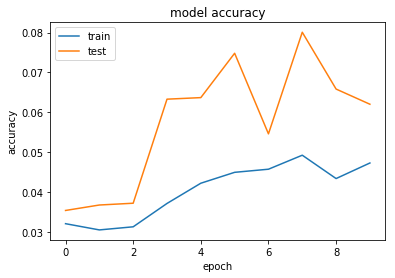

In [9]:
import matplotlib.pyplot as plt
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

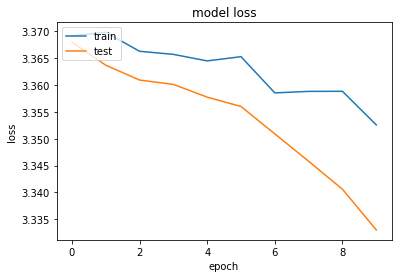

In [10]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()